In [15]:
import numpy as np
import cv2
import urllib
from matplotlib import pyplot as plt
from skimage import io

In [16]:
img1 = cv2.imread('images/orb_example_img1.png',0)# queryImage
img2 = cv2.imread('images/orb_example_img2.png',0) # trainImage

# Initiate ORB detector
orb = cv2.xfeatures2d.SIFT_create()

In [17]:
# find the keypoints and descriptors with SIFT
kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)

In [18]:
# FLANN parameters
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)   # or pass empty dictionary

In [19]:
flann = cv2.FlannBasedMatcher(index_params,search_params)

import timeit
start = timeit.default_timer()

matches = flann.knnMatch(des1,des2,k=2)
duration = timeit.default_timer() - start
print("time: "+str(duration)+"seconds")

time: 0.209980964661seconds


In [20]:
# Need to draw only good matches, so create a mask
matchesMask = [[0,0] for i in xrange(len(matches[:100]))]

# ratio test as per Lowe's paper
for i,(m,n) in enumerate(matches[:100]):
    if m.distance < 0.7*n.distance:
        matchesMask[i]=[1,0]

draw_params = dict(matchColor = (0,255,0),
                   singlePointColor = (255,0,0),
                   matchesMask = matchesMask,
                   flags = 0)

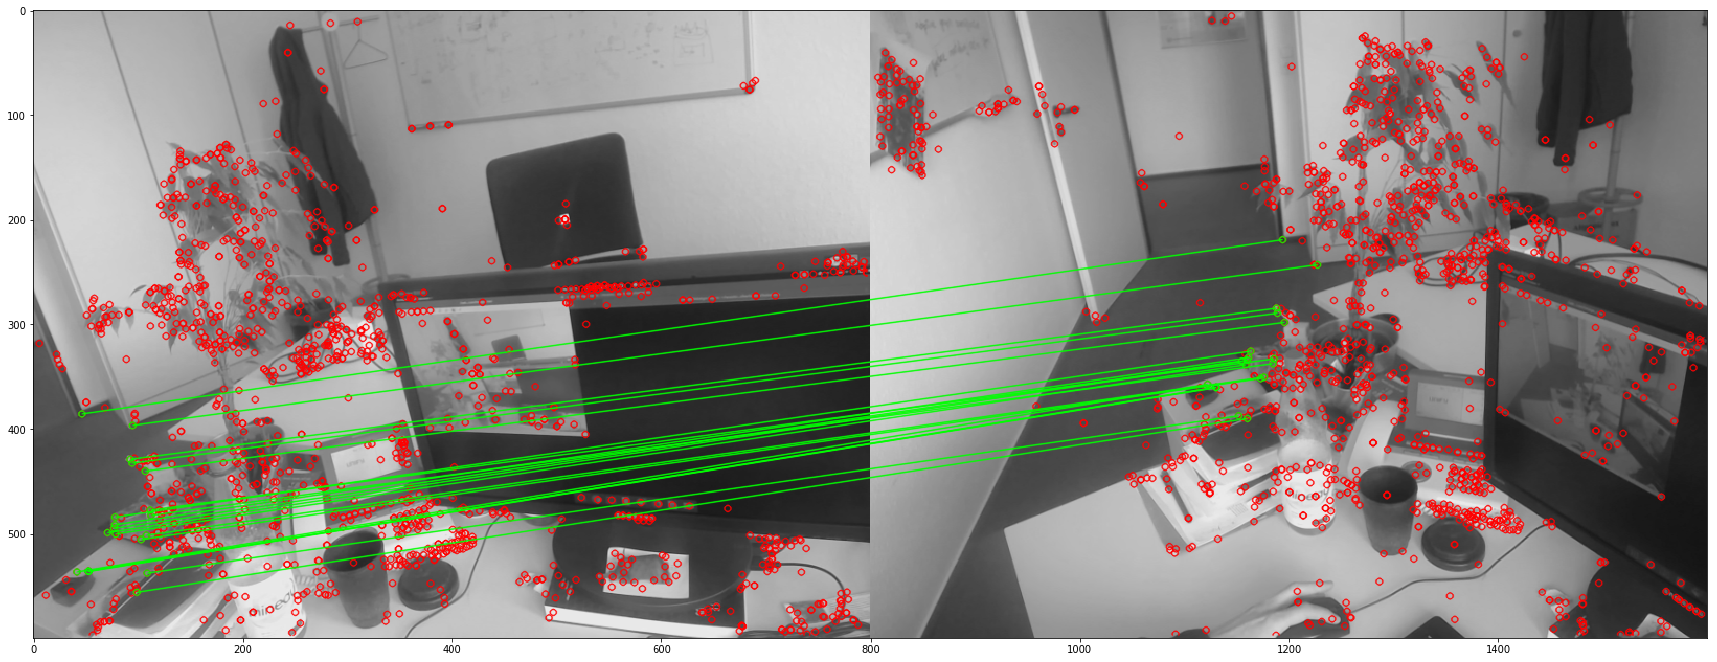

In [14]:
# Draw first 10 matches.
img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,matches[:100], None, **draw_params)
fig = plt.figure(figsize = (30,30))
iplot = fig.add_subplot(111)
iplot.imshow(img3)
plt.show()